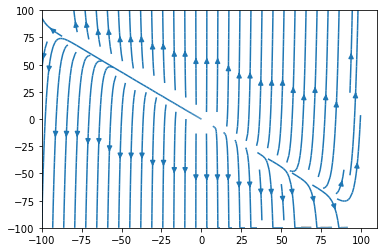

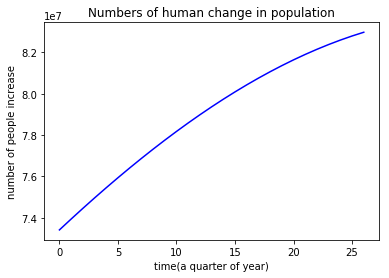

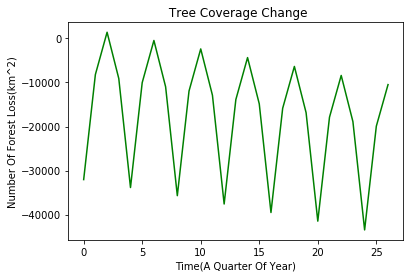

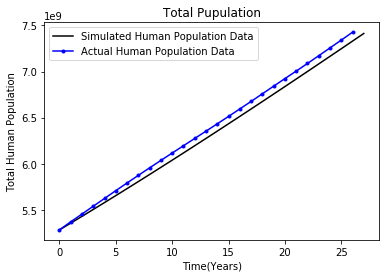

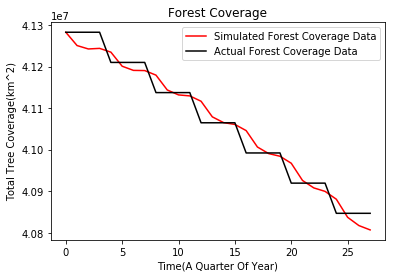

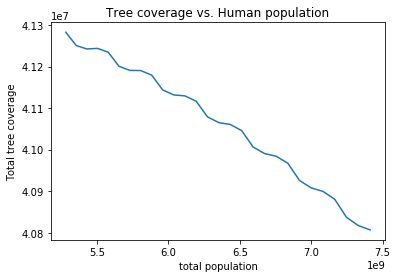

In [4]:
from pylab import *
from math import*   
import matplotlib.pyplot as plt 

#################################################Old equation####################################################
#parameter
#Ht = #number of human
#Ft = #number of trees
#b = #number of trees used per human(km^2/person)
#c = #number of trees planted per human(km^2/person)
#n = #natural death rate of trees
#l = #natural birth rate of trees
#alpha = #number of human gained per tree consumed
#gamma = #number of human loss per tree loss
#r = Malthusian parameter
#K_H = human capacity
#
b = 0.00000651
c = 0.00000044
l = 0.0000001013
n = 0.0000003036
alpha = 1250
gamma = 30
run_time = 27
K_H = 10000000000
K_F = 44000000.0
r = 0.0126
ActDataF = [41282694.9, 41210027.5, 41137360.5, 41064693.4, 40992025.9, 40919358.7,  40846691.3, 40774024.2, 40701356.7, 40628689.7, 40556022.3, 40510303.3, 40464584.1, 40418865.2, 40373146, 40327427, 40293287.6, 40259147.7, 40225008.7, 40190869.1, 40156729.7, 40123639.2, 40090560.5, 40057482, 40024403.3, 39991324.6, 39958245.9]
ActDataF2 = [41282694.9, 41282694.9,41282694.9,41282694.9,41210027.5, 41210027.5,41210027.5,41210027.5,41137360.5, 41137360.5,41137360.5,41137360.5 ,41064693.4, 41064693.4,41064693.4,41064693.4,40992025.9,40992025.9, 40992025.9, 40992025.9, 40919358.7, 40919358.7, 40919358.7, 40919358.7,40846691.3,40846691.3,40846691.3,40846691.3]
ActDataH = [5281340078, 5369210095, 5453393960, 5538448726, 5622575421,5707533023, 5790454220, 5873071768, 5954810550, 6035284135, 6115108363, 6194460444, 6273526441, 6352677699, 6432374971, 6512602867, 6593623202, 6675130418, 6757887172, 6840591577, 6922947261, 7004011262, 7086993625, 7170961674, 7255653881, 7340548192, 7426103221]

    

def initialization():
    global Ht, Ft, HrResult,FrResult,Hr, Fr, t, HtResult, FtResult,Rresult, ROF, h
    Ht = 5281340078.0
    Ft = 41282694.9
    Hr = 0
    Fr = 0
    HrResult = []
    FrResult = []
    HtResult = [Ht]
    FtResult = [Ft]
    Rresult= []
    ROF = 0
    h = 0

    
def observe():
    global Ht, Ft, HrResult, FrResult, Hr, Fr, t, HtResult, FtResult,Rresult, ROF, h
    HrResult.append(Hr)
    FrResult.append(Fr)
    HtResult.append(Ht)
    FtResult.append(Ft)
    Rresult.append(ROF)
    
def update():
    global Ht, Ft, HrResult, FrResult, Hr, Fr, t, HtResult, FtResult, ROF, h
   # ROF = (1.0 - (1.0-(ActData[t-1]-Ft)/ActData[t-1])**(1/h))
    nextFt = c*Ht - b*Ht + 1/1200*abs(math.sin(h))*Ft + Ft
    nextHt = r*(K_H-Ht)/K_H*Ht+alpha*b*Ht + gamma*((l-n)*Ft + (c-b)*Ht) +Ht
    Fr = c*Ht - b*Ht + (1/1200*abs(math.sin(h)))*Ft
    Hr = r*(K_H-Ht)/K_H*Ht+alpha*b*Ht + gamma*((l-n)*Ft + (c-b)*Ht)
    h += 1/4*math.pi
    Ht = nextHt
    Ft = nextFt
    
initialization()
for i in range(run_time):
    update()
    observe()
    
xValue, yValue  = meshgrid(arange(-100, 100, 0.1), arange(-100, 100, 0.1))
xdot = c*yValue - b*yValue + (1/1200*abs(math.sin(h)))*xValue
ydot = r*yValue + alpha*b*yValue + gamma*(1/1200*abs(math.sin(h))*xValue + (c-b)*xValue)
streamplot(xValue, yValue, xdot, ydot)
show()

plt.plot(HrResult, color='blue')
plt.title('Numbers of human change in population')
plt.xlabel('time(a quarter of year)')
plt.ylabel('number of people increase');
show()
plt.plot(FrResult, color='green')
plt.title(' Tree Coverage Change')
plt.xlabel('Time(A Quarter Of Year)')
plt.ylabel('Number Of Forest Loss(km^2)');
show()

plt.plot(HtResult, color ='black', label = "Simulated Human Population Data")
plt.plot(ActDataH, c = 'blue', marker = ".", label = "Actual Human Population Data")
plt.legend()
plt.title('Total Pupulation')
plt.xlabel('Time(Years)')
plt.ylabel('Total Human Population');
show()

plot(FtResult, color ='Red', label = 'Simulated Forest Coverage Data')
plot(ActDataF2, color = 'black', label = "Actual Forest Coverage Data")
plt.title('Forest Coverage')
plt.legend()
plt.xlabel('Time(A Quarter Of Year)')
plt.ylabel('Total Tree Coverage(km^2)');
show()



plot(HtResult,FtResult )
plt.title('Tree coverage vs. Human population')
plt.xlabel('total population')
plt.ylabel('Total tree coverage');
show()